# Data

In [1]:
level = [1,2,3,4,5]
reduction = [5,10,15,20,30]
households = [200,200,200,200,200]
redeemed = [30,55,70,100,137]
proportion = [.150,.275,.350,.500,.685]

In [2]:
def pii(b0,b1,x): #sigmoidal function
    import math
    pii = math.exp(b0+b1*x)/(1+ math.exp(b0+b1*x))
    return(pii)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global proportion,reduction #access lists already defined external to function
    mod=[0 for i in range(len(proportion))]
    for i in range(len(level)):
        mod[i]=pii(beta[0],beta[1],reduction[i])
    merit = sse(mod,proportion)
    return(merit)

import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

In [3]:
beta = [0,0] # initial guess
merit(beta) # test for exceptions

0.22985

Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 3
         Function evaluations: 88
 b0 =  -2.0165402749739756
 b1 =  0.09580373659184761


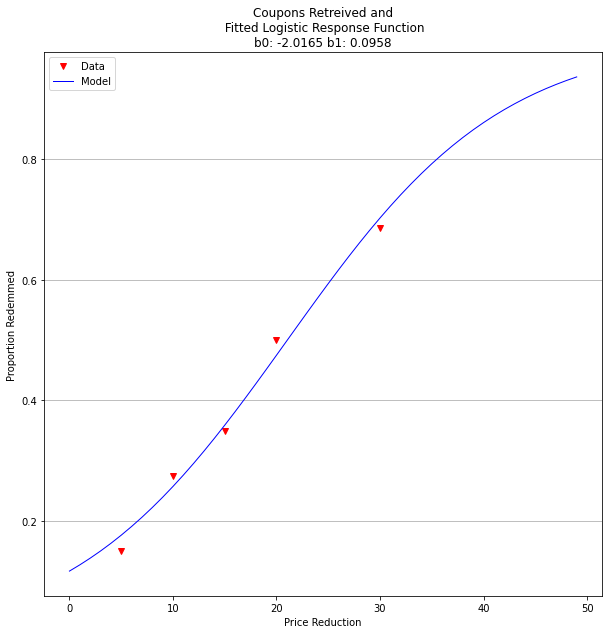

In [4]:
import numpy as np
from scipy.optimize import minimize

x0 = np.array([-2,0.09])
res = minimize(merit, x0, method='powell',options={'disp': True})

fitted=[0 for i in range(50)]
xaxis =[0 for i in range(50)]
for i in range(50):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))
    
print(" b0 = ",res.x[0])
print(" b1 = ",res.x[1])
plottitle = 'Coupons Retreived and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed',plottitle)

In [5]:
# Test the merit function
b0=-2.04435
b1=0.096834
mod=[0 for i in range(len(level))]
for i in range(len(level)):
    mod[i]=pii(b0,b1,reduction[i])
err = sse(mod,proportion)
print(err)

fitted=[0 for i in range(50)]
xaxis=[0 for i in range(50)]
for i in range(50):
    xaxis[i]=float(i)
    fitted[i]=pii(b0,b1,float(i))


0.00206662968218915


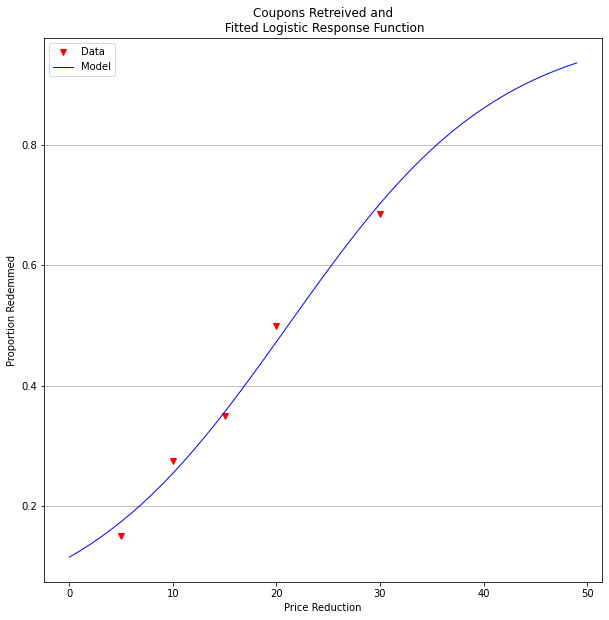

In [6]:
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed','Coupons Retreived and\n Fitted Logistic Response Function')

In [7]:
def merit(beta): # merit function to minimize
    global proportion,reduction #access lists already defined external to function
    mod=[0 for i in range(len(proportion))]
    for i in range(len(level)):
        mod[i]=pii(beta[0],beta[1],reduction[i])
    merit = sse(mod,proportion)
    return(merit)

In [8]:
def merit(beta): # merit function to minimize
    global proportion,reduction #access lists already defined external to function
    mod=[0 for i in range(len(proportion))]
    for i in range(len(level)):
        mod[i]=pii(beta[0],beta[1],reduction[i])
    merit = sse(mod,proportion)
    return(merit)